In [1]:
CODE_ROOT = pwd() * "/../.."

"/global/u2/r/rstrauss/repos/MPAS_Ocean_Julia/output/operator_convergence/../.."

In [2]:
using DelimitedFiles
include(CODE_ROOT * "/visualization.jl")

vertexHeatMapMesh (generic function with 1 method)

In [3]:
function convergence_plot(operator_name, ncells, ErrorNorm, errortype; decimals=2)
    nCellsx = sqrt.(ncells)
    
    A = [log10.(nCellsx)    ones(length(nCellsx))]
    m, c = A \ log10.(ErrorNorm)
    y = m*log10.(nCellsx) .+ c
    y = 10 .^ y
    
    slopestr ="$(round(m,digits=decimals))"
    while length(split(slopestr, ".")[end]) < decimals
        slopestr *= "0"
    end

    fig, ax = subplots(1,1, figsize=(9,9))
    fig.tight_layout()
    loglog(nCellsx, ErrorNorm, label="$errortype error norm", marker="s", markersize=12.5, linestyle="None", color="black")
    loglog(nCellsx, y, label="Best fit line, slope=$(slopestr)", color="black", linewidth=2)
    ax.set_title("Convergence of $operator_name",
        fontsize=30, fontweight="bold", y=1.035)
    ax.legend(loc="upper right", fontsize=22.5)
    ax.set_xlabel("Number of cells in zonal direction", fontsize=25, labelpad=7.5)
    ax.set_ylabel("$errortype error norm of $(split(lowercase(operator_name), '\n')[1])", fontsize=25, labelpad=7.5)
    ax.tick_params(axis="both", which="major", labelsize=20)

    grid(which="both")
    
    return fig, ax
end

convergence_plot (generic function with 1 method)

In [4]:
function readconvergencefile(operator_name, periodicity)
    fname = CODE_ROOT * "/output/operator_convergence/$operator_name/$periodicity/"
    fname = filter(x->x[end-3:end] == ".txt", readdir(fname, join=true))[end]
    return readdlm(fname), fname
end

readconvergencefile (generic function with 1 method)

In [5]:
operatortitles = Dict{String,String}(
    "Numerical Curl (at Cell Center)" => "Curl Operator \nInterpolated to Cell Centers",
    "Numerical Curl (at Vertex)" => "Curl Operator \nCalculated at Vertices",
    "Numerical Divergence" => "Divergence Operator \nat Cell Centers",
    "Numerical Gradient" => "Gradient Operator \nNormal to Edge",
    "Tangential Velocity" => "Tangential Velocity \nalong Edges"
)

Dict{String, String} with 5 entries:
  "Numerical Gradient"              => "Gradient Operator \nNormal to Edge"
  "Numerical Curl (at Cell Center)" => "Curl Operator \nInterpolated to Cell Ce…
  "Numerical Divergence"            => "Divergence Operator \nat Cell Centers"
  "Numerical Curl (at Vertex)"      => "Curl Operator \nCalculated at Vertices"
  "Tangential Velocity"             => "Tangential Velocity \nalong Edges"

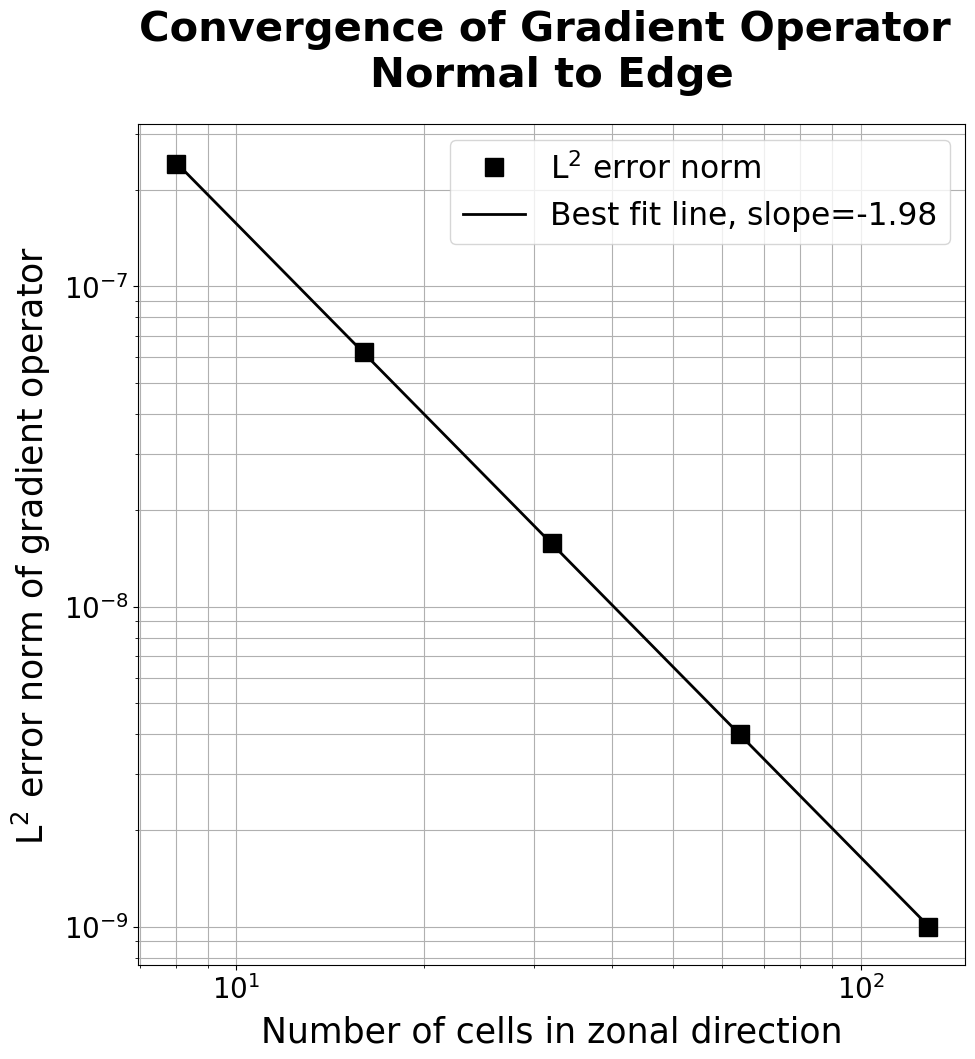

saved file at /global/u2/r/rstrauss/repos/MPAS_Ocean_Julia/output/operator_convergence/../../output/operator_convergence/Numerical Gradient/NonPeriodic_xy/2022-08-28T21:28:51.731.txt_convergenceplot.pdf


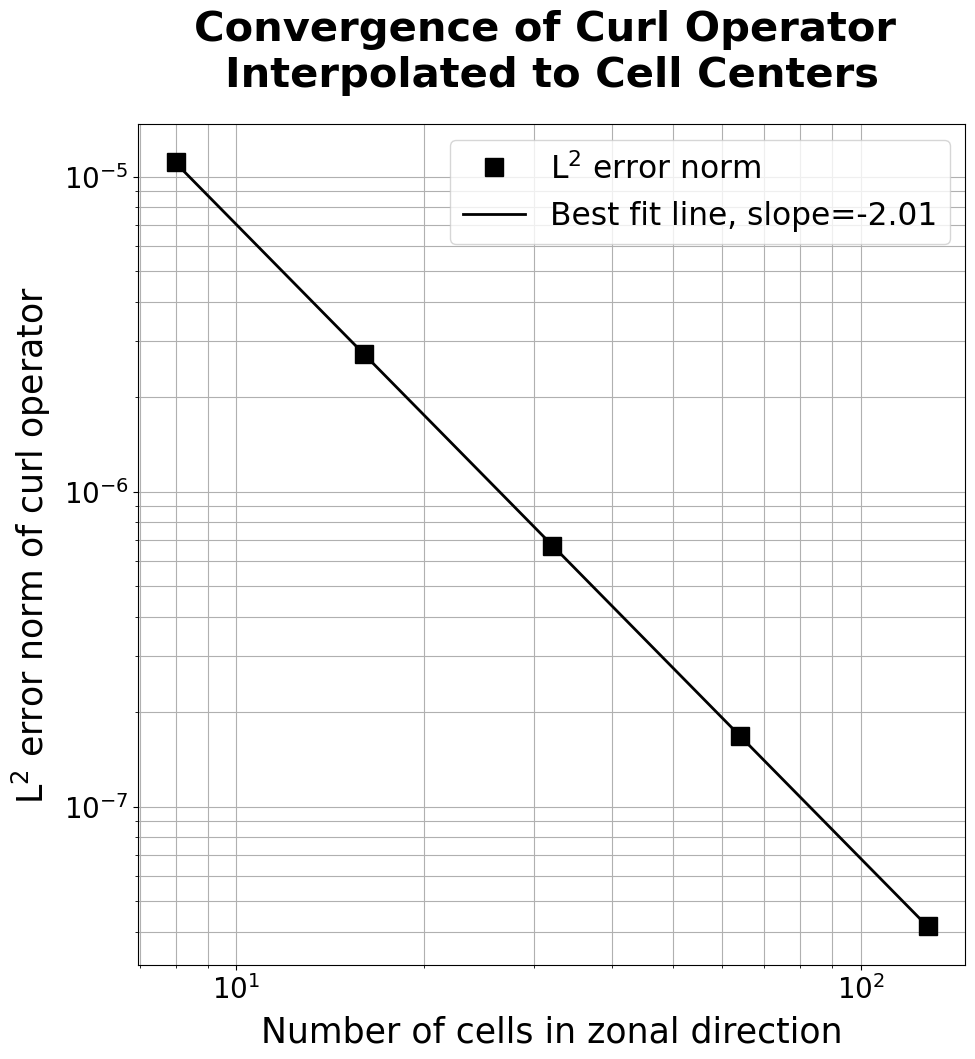

saved file at /global/u2/r/rstrauss/repos/MPAS_Ocean_Julia/output/operator_convergence/../../output/operator_convergence/Numerical Curl (at Cell Center)/NonPeriodic_xy/2022-08-28T21:27:01.017.txt_convergenceplot.pdf


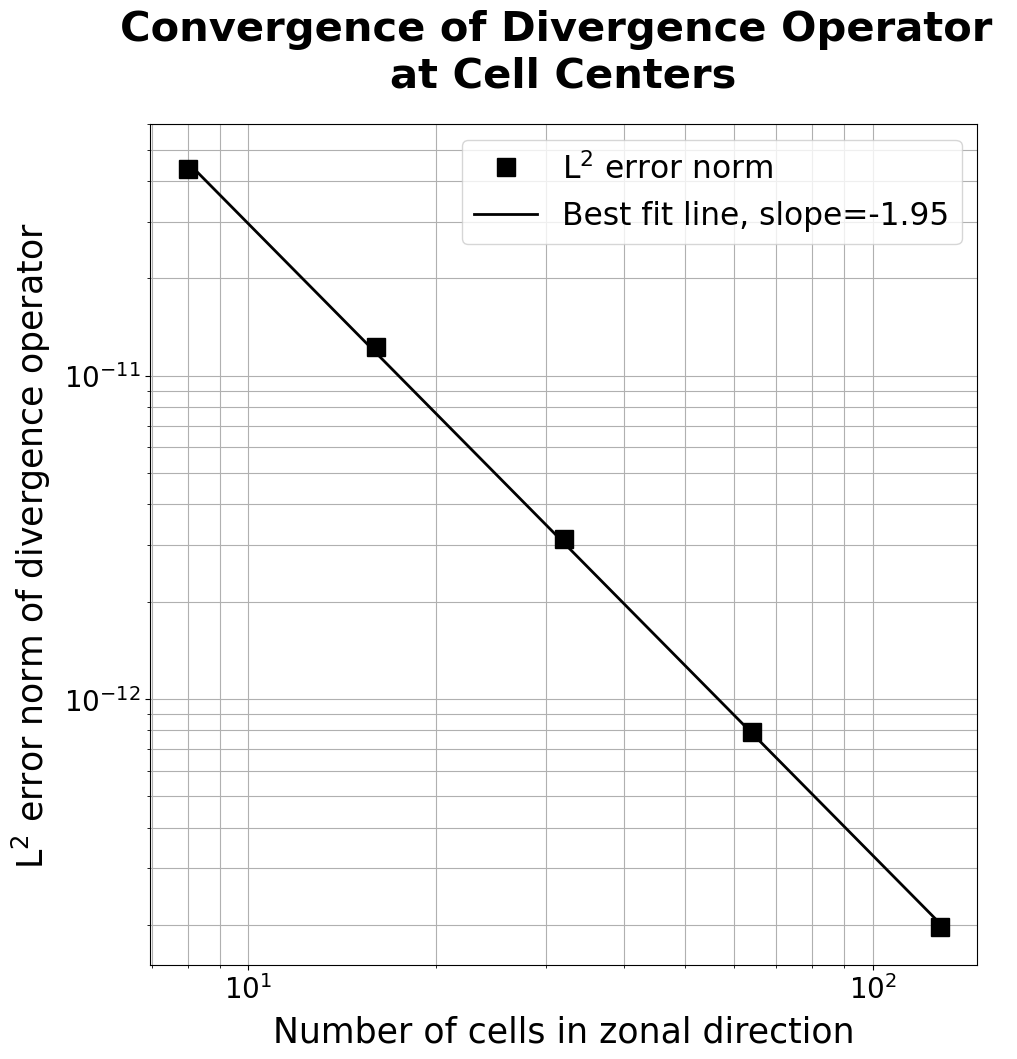

saved file at /global/u2/r/rstrauss/repos/MPAS_Ocean_Julia/output/operator_convergence/../../output/operator_convergence/Numerical Divergence/NonPeriodic_xy/2022-08-28T21:30:01.018.txt_convergenceplot.pdf


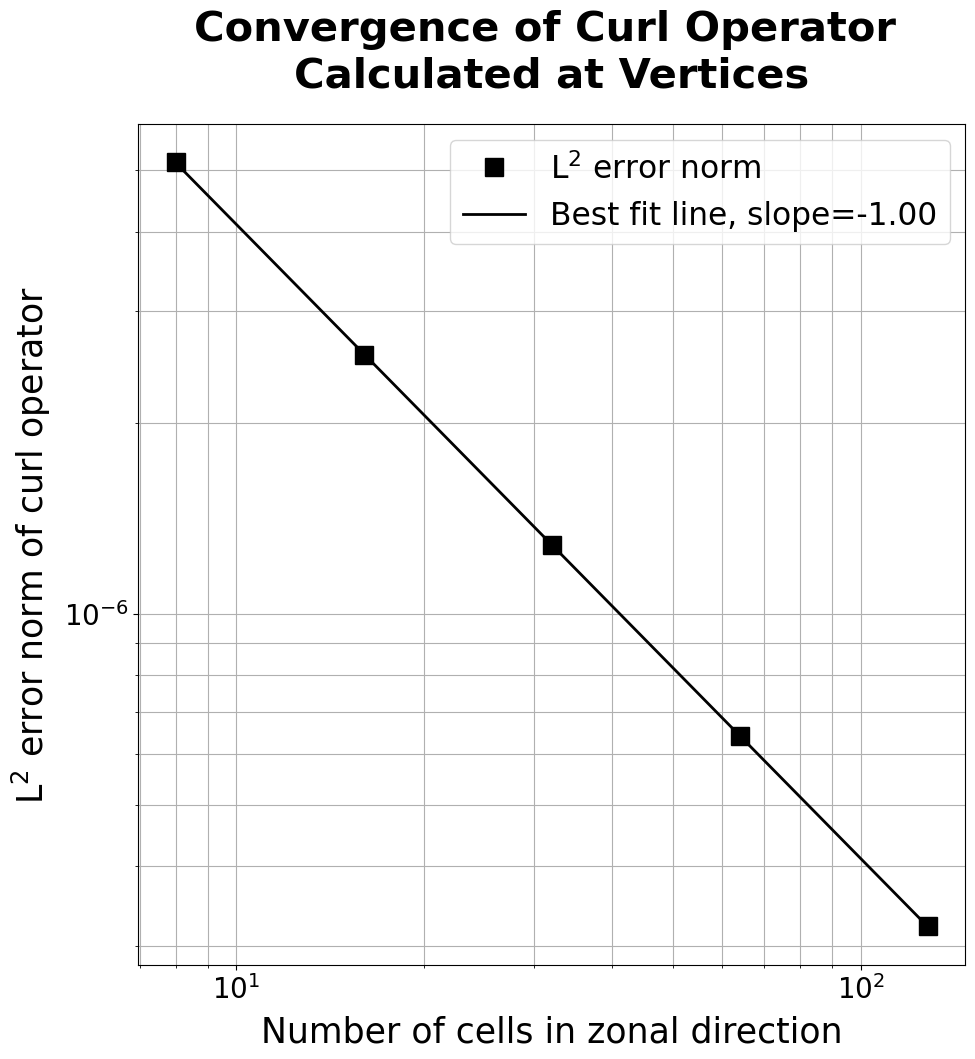

saved file at /global/u2/r/rstrauss/repos/MPAS_Ocean_Julia/output/operator_convergence/../../output/operator_convergence/Numerical Curl (at Vertex)/NonPeriodic_xy/2022-08-28T21:26:13.739.txt_convergenceplot.pdf


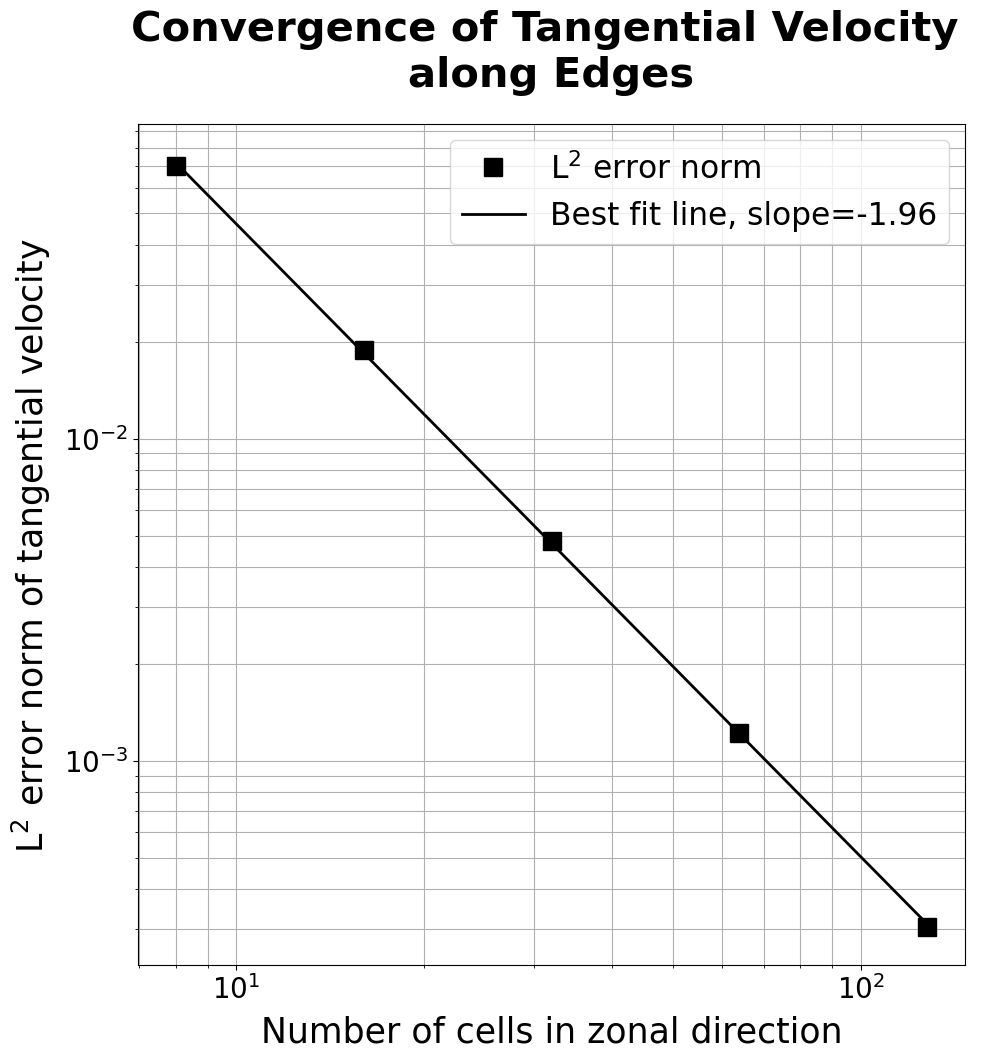

saved file at /global/u2/r/rstrauss/repos/MPAS_Ocean_Julia/output/operator_convergence/../../output/operator_convergence/Tangential Velocity/NonPeriodic_xy/2022-08-28T21:14:56.672.txt_convergenceplot.pdf


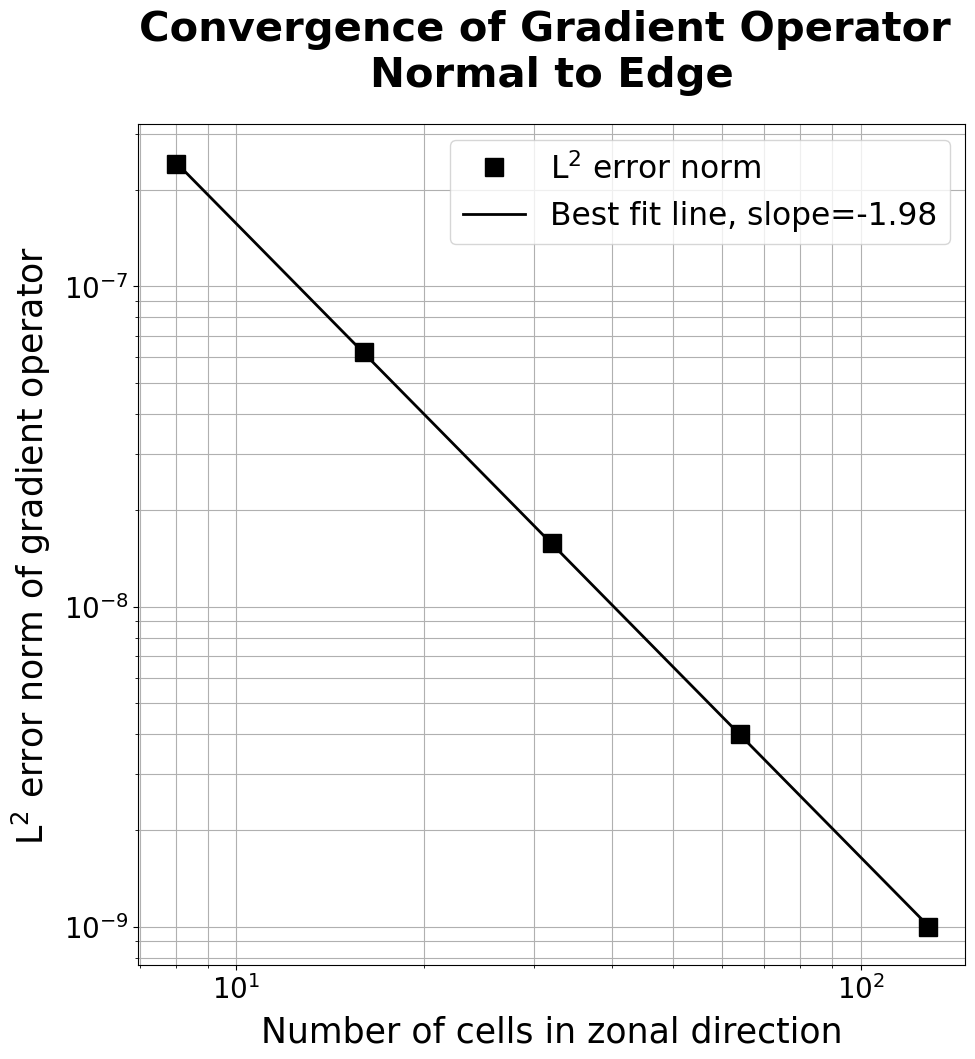

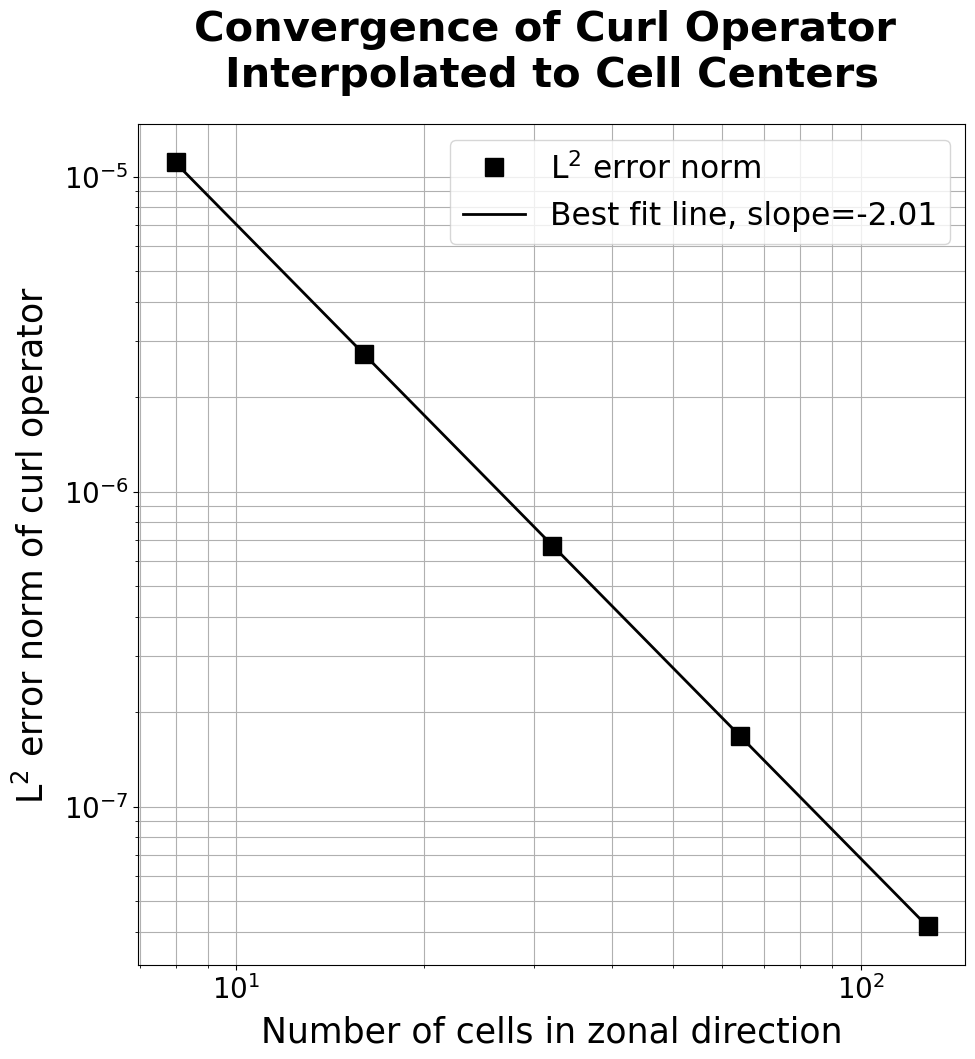

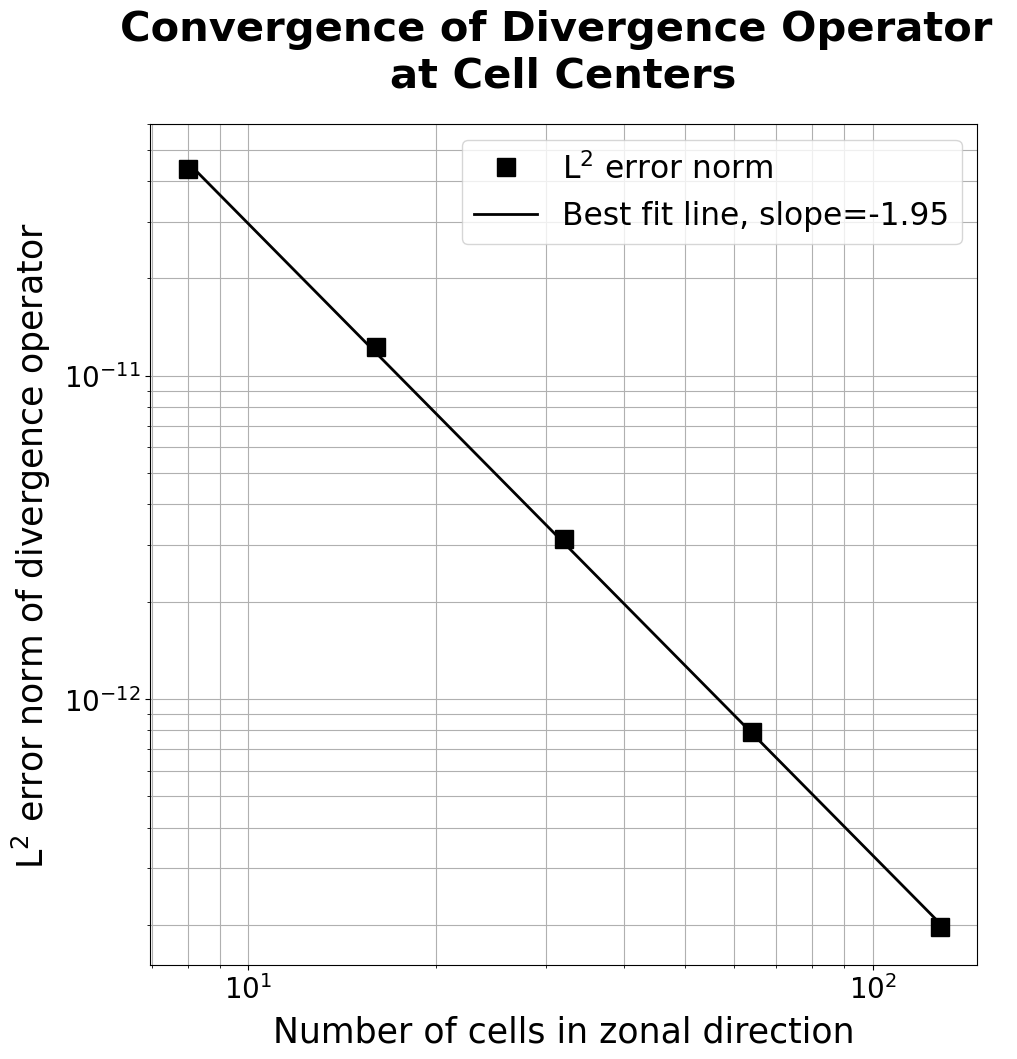

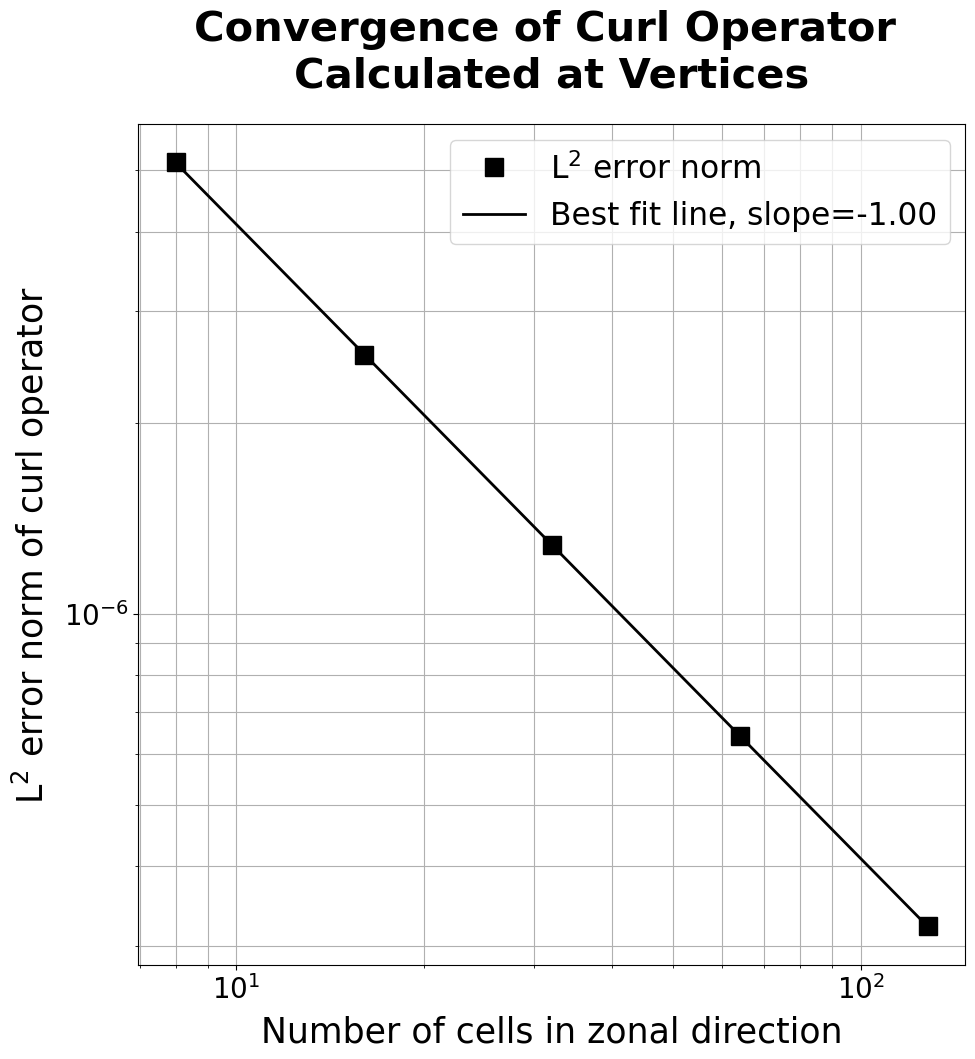

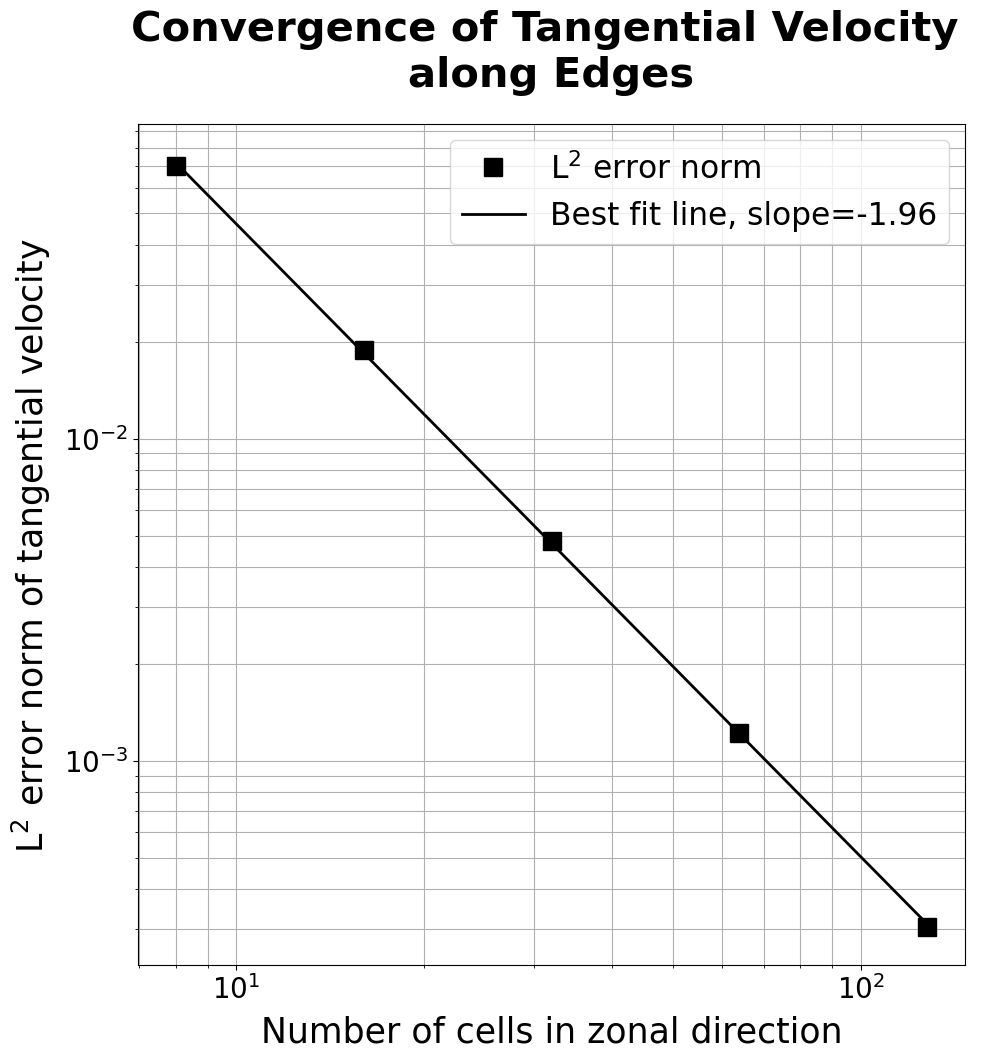

In [7]:
savefigs = false
for operator_name in keys(operatortitles)
    data, fname = readconvergencefile(operator_name, "NonPeriodic_xy")
    ncells = data[1,2:end]
    L2ErrorNorm = data[4,2:end]
    fig, ax = convergence_plot(operatortitles[operator_name], ncells, L2ErrorNorm, "L\$^2\$")
    display(fig)
    
    if savefigs
        fig.savefig("$(fname)_convergenceplot.pdf", bbox_inches="tight")
        println("saved file at $(fname)_convergenceplot.pdf")
    end
end